# Step 2: Tìm sự tương quan của các dữ liệu với nhau

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data from CSV
df = pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [3]:
features = [i for i in df.columns]
features.remove("Age")
features.remove("Billing Amount")
features.remove("Room Number")


def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")


convert_cat(df, features)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Name                10000 non-null  category
 1   Age                 10000 non-null  int64   
 2   Gender              10000 non-null  category
 3   Blood Type          10000 non-null  category
 4   Medical Condition   10000 non-null  category
 5   Date of Admission   10000 non-null  category
 6   Doctor              10000 non-null  category
 7   Hospital            10000 non-null  category
 8   Insurance Provider  10000 non-null  category
 9   Billing Amount      10000 non-null  float64 
 10  Room Number         10000 non-null  int64   
 11  Admission Type      10000 non-null  category
 12  Discharge Date      10000 non-null  category
 13  Medication          10000 non-null  category
 14  Test Results        10000 non-null  category
dtypes: category(12), float64(1), int64(2)

### **Biểu thị mối quan hệ giữa Gender và Test Results**

<Axes: xlabel='Gender', ylabel='count'>

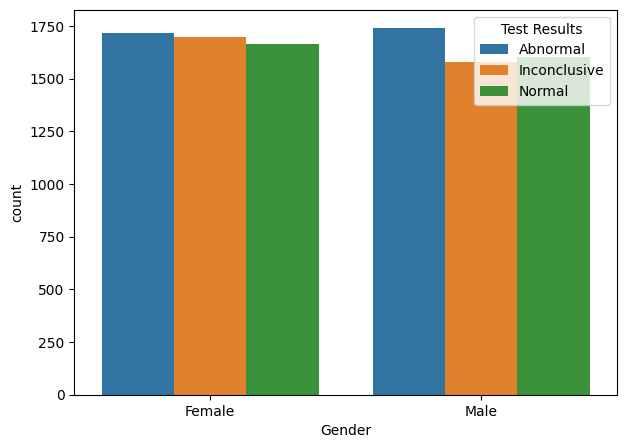

In [4]:
plt.figure(figsize=(7,5))
sns.countplot(df, x='Gender',hue='Test Results')

Tỉ lệ đàn ông mắc bệnh cao hơn nữ

### **Tương tự, biểu thị mối tương quan khác**

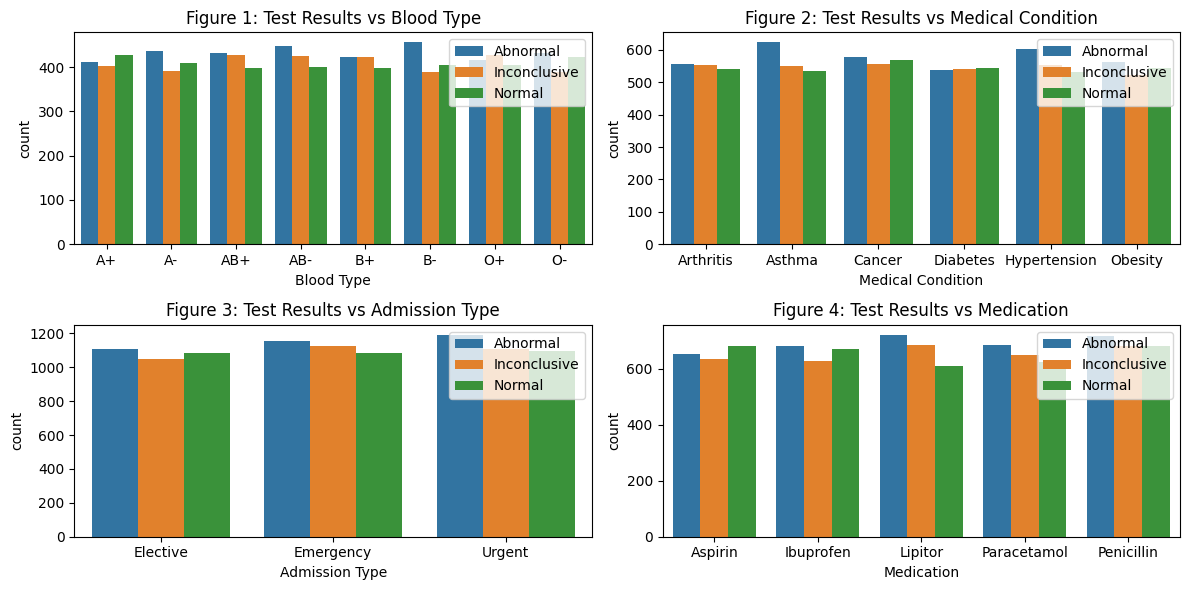

In [11]:
# Vì các feature như name, doctor có quá nhiều kiểu dữ liệu độc lập nên ta sẽ không xét
cols = ['Blood Type', 'Medical Condition','Admission Type','Medication']

n_rows, n_cols = 2, 2
fig, ax = plt.subplots(n_rows, n_cols, figsize = (6*n_rows, 3*n_cols))
for r in range(n_rows):
  for c in range(n_cols):
    i = n_cols*r+c
    if i < len(cols):
      ax_i = ax[r,c]
      sns.countplot(df, x = cols[i], hue = 'Test Results', ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: Test Results vs {cols[i]}")
      ax_i.legend(title='', labels = ['Abnormal','Inconclusive','Normal'], loc = 'upper right')
plt.tight_layout()
plt.show()

### **Nhận xét**
Với bảng loại máu:
* Nếu là A+ thì khả năng mắc bệnh ít hơn
* Với các loại máu A-, AB+, AB-, B- thì khả năng mắc bệnh cao hơn hẳn

Với bảng bệnh
* Nếu bệnh nhân bị hen suyễn hoặc tăng huyết áp thì khả năng sẽ mắc bệnh

Chủ yếu bệnh nhân nhập viện khẩn cấp hoặc cận khẩn cấp có tỉ lệ mắc bệnh cao hơn <br><br>
Với các loại thuốc:
* Với Aspirin, người dùng có tỉ lệ bị bệnh thấp hơn
* Còn lại, người dùng có tỉ lệ bệnh cao hơn, cao nhất là dùng thuốc Lipitor

#### **Với các kiểu dữ liệu numeric ta biểu diễn như sau**

<Axes: xlabel='Age', ylabel='Count'>

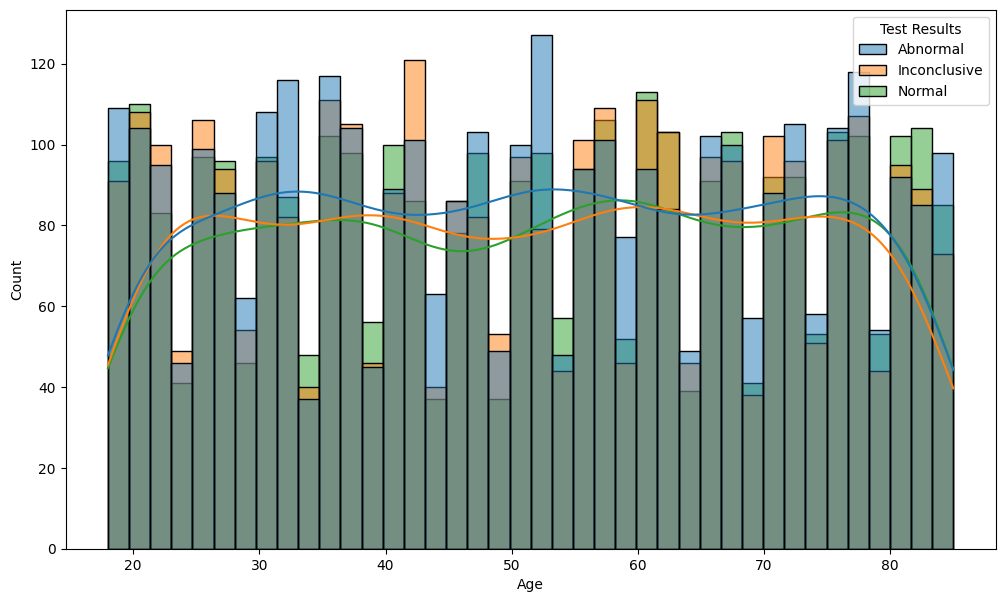

In [12]:
# Với Age
plt.figure(figsize=(12,7))
sns.histplot(df,x='Age',hue='Test Results',bins=40,kde = True)

Đa phần ở các độ tuổi, phát hiện bệnh thường nhiều hơn
<br> Tuy nhiên, trong độ tuổi 58-63, thì tỉ lệ ko mắc bệnh lại cao hơn

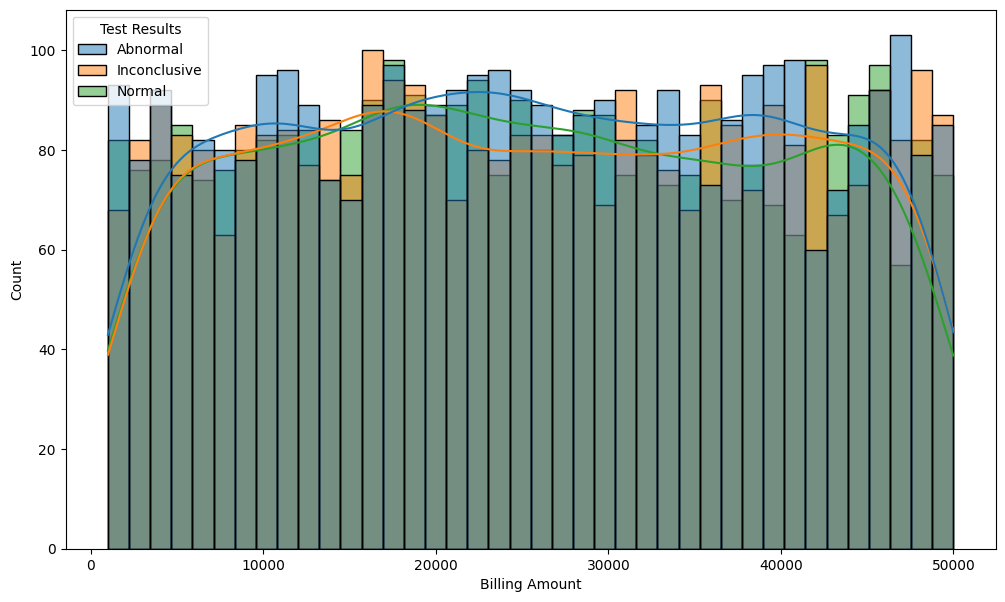

In [7]:
# Với Billing Amount
plt.figure(figsize=(12, 7))
sns.histplot(df, x="Billing Amount", hue="Test Results", bins=40, kde=True)
plt.show()